http://actionrecognition.net/files/dsetdetail.php?did=15;
https://github.com/epic-kitchens/annotations

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from childes_mi.utils.paths import DATA_DIR, ensure_dir, EPIC_KITCHENS_DIR
import urllib.request

In [5]:
import pandas as pd

In [6]:
actions_data = pd.read_csv(EPIC_KITCHENS_DIR / 'EPIC_train_action_labels.csv')

In [8]:
pd.read_csv(EPIC_KITCHENS_DIR / 'EPIC_train_action_labels.csv')

,uid,participant_id,video_id,narration,start_timestamp,stop_timestamp,start_frame,stop_frame,verb,verb_class,noun,noun_class,all_nouns,all_noun_classes
0,0,P01,P01_01,open door,00:00:00.14,00:00:03.37,8,202,open,2,door,8,['door'],[8]
1,1,P01,P01_01,turn on light,00:00:04.37,00:00:06.17,262,370,turn-on,12,light,113,['light'],[113]
2,2,P01,P01_01,close door,00:00:06.98,00:00:09.49,418,569,close,3,door,8,['door'],[8]
3,3,P01,P01_01,open fridge,00:00:12.77,00:00:13.99,766,839,open,2,fridge,10,['fridge'],[10]
4,4,P01,P01_01,take celery,00:00:15.25,00:00:16.40,915,983,take,0,celery,185,['celery'],[185]
5,5,P01,P01_01,take container,00:00:16.50,00:00:18.06,990,1083,take,0,container,29,['container'],[29]
6,6,P01,P01_01,take tofu,00:00:18.19,00:00:21.14,1091,1268,take,0,tofu,159,['tofu'],[159]
7,7,P01,P01_01,close fridge,00:00:21.91,00:00:23.33,1314,1399,close,3,fridge,10,['fridge'],[10]
8,8,P01,P01_01,open fridge,00:00:23.18,00:00:24.29,1390,1457,open,2,fridge,10,['fridge'],[10]
9,9,P01,P01_01,take carrots and,00:00:24.48,00:00:27.94,1468,1676,take,0,carrot,40,['carrot'],[40]


In [9]:
actions_data[:3]

,uid,participant_id,video_id,narration,start_timestamp,stop_timestamp,start_frame,stop_frame,verb,verb_class,noun,noun_class,all_nouns,all_noun_classes
0,0,P01,P01_01,open door,00:00:00.14,00:00:03.37,8,202,open,2,door,8,['door'],[8]
1,1,P01,P01_01,turn on light,00:00:04.37,00:00:06.17,262,370,turn-on,12,light,113,['light'],[113]
2,2,P01,P01_01,close door,00:00:06.98,00:00:09.49,418,569,close,3,door,8,['door'],[8]


In [13]:
actions_data.participant_id.unique()

array(['P01', 'P02', 'P03', 'P04', 'P05', 'P06', 'P07', 'P08', 'P10',
       'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P19', 'P20', 'P21',
       'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30',
       'P31'], dtype=object)

In [14]:
from tqdm.autonotebook import tqdm

In [45]:
actions = [actions_data[actions_data.video_id == vid].verb_class.values for vid in tqdm(actions_data.video_id.unique())]

In [46]:
actions_name = [[actions_data[actions_data.video_id == vid].verb.values, actions_data[actions_data.video_id == vid].noun.values] for vid in tqdm(actions_data.video_id.unique())]

In [47]:
#[(verb +' '+ noun) for verb, noun in zip(actions_name[0][0], actions_name[0][1])]

In [48]:
behav_lens = [len(i) for i in actions]

In [49]:
import matplotlib.pyplot as plt

In [50]:
import numpy as np

In [51]:
np.sum(behav_lens)

28472

In [52]:
len(np.unique(np.concatenate(actions)))

119

In [53]:
np.median(behav_lens)

45.0

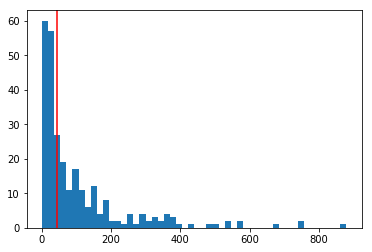

In [54]:
fig, ax = plt.subplots()
ax.hist(behav_lens, bins = 50);
ax.axvline(np.median(behav_lens), color='red')

### MI

In [60]:
actions_resorted = np.array(actions)[np.argsort(behav_lens)[::-1]]

In [61]:
vids_resorted = actions_data.video_id.unique()[np.argsort(behav_lens)[::-1]]

In [62]:
len(actions_resorted[0])

879

In [63]:
from childes_mi.information_theory import mutual_information as mi

In [64]:
distances = np.arange(1,np.median(behav_lens)+1).astype('int')

### longest sequence

In [65]:
MI_DF = pd.DataFrame(
    columns=["MI", "MI_var", "shuff_MI", "shuff_MI_var", "distances", "seq", "seq_len", 'video_id'],
)
for vid, seq in tqdm(zip(vids_resorted[:20], actions_resorted[:20])):
    (MI, MI_var), (shuff_MI, shuff_MI_var) = mi.sequential_mutual_information(
        [actions[np.argmax(behav_lens)]], distances=distances, n_jobs=-1, estimate=True
    )
    
    MI_DF.loc[len(MI_DF)] = [MI, MI_var, shuff_MI, shuff_MI_var, distances, seq, len(seq), vid]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  45 | elapsed:    0.1s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  12 out of  45 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  22 out of  45 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  32 out of  45 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  42 out of  45 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  45 | elapsed:    0.1s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  12 out of  45 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  22 out of  45 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  32 out of  45 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  42 out of  45 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  45 | elapsed:    0.1s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  12 out of  45 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  22 out of  45 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  32 out of  45 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  42 out of  45 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  45 | elapsed:    0.1s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  12 out of  45 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  22 out of  45 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  32 out of  45 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  42 out of  45 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  45 | elapsed:    0.1s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  12 out of  45 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  22 out of  45 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  32 out of  45 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  42 out of  45 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  45 | elapsed:    0.1s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  12 out of  45 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  22 out of  45 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  32 out of  45 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  42 out of  45 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  45 | elapsed:    0.1s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done  12 out of  45 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  22 out of  45 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  32 out of  45 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  42 out of  45 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  45 | elapsed:    0.2s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done  12 out of  45 | elapsed:    0.2s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  22 out of  45 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  32 out of  45 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  42 out of  45 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.3s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  45 | elapsed:    0.1s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  12 out of  45 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  22 out of  45 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  32 out of  45 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  42 out of  45 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  45 | elapsed:    0.1s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  12 out of  45 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  22 out of  45 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  32 out of  45 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  42 out of  45 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  45 | elapsed:    0.1s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  12 out of  45 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  22 out of  45 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  32 out of  45 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  42 out of  45 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  45 | elapsed:    0.1s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  12 out of  45 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  22 out of  45 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  32 out of  45 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  42 out of  45 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  45 | elapsed:    0.1s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  12 out of  45 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  22 out of  45 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  32 out of  45 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  42 out of  45 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  45 | elapsed:    0.1s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  12 out of  45 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  22 out of  45 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  32 out of  45 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  42 out of  45 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  45 | elapsed:    0.1s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  12 out of  45 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  22 out of  45 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  32 out of  45 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  42 out of  45 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  45 | elapsed:    0.1s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  12 out of  45 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  22 out of  45 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  32 out of  45 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  42 out of  45 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  45 | elapsed:    0.1s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  12 out of  45 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  22 out of  45 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  32 out of  45 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  42 out of  45 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  45 | elapsed:    0.1s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  12 out of  45 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  22 out of  45 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  32 out of  45 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  42 out of  45 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  45 | elapsed:    0.1s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  12 out of  45 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  22 out of  45 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  32 out of  45 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  42 out of  45 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  45 | elapsed:    0.1s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  12 out of  45 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  22 out of  45 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  32 out of  45 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  42 out of  45 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  45 | elapsed:    0.1s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  12 out of  45 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  22 out of  45 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  32 out of  45 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  42 out of  45 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  45 | elapsed:    0.1s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  12 out of  45 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  22 out of  45 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  32 out of  45 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  42 out of  45 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  45 | elapsed:    0.1s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  12 out of  45 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  22 out of  45 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  32 out of  45 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  42 out of  45 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  45 | elapsed:    0.1s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  12 out of  45 | elapsed:    0.1s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  22 out of  45 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  32 out of  45 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  42 out of  45 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  45 | elapsed:    0.1s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  12 out of  45 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  22 out of  45 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  32 out of  45 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  42 out of  45 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  45 | elapsed:    0.1s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  12 out of  45 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  22 out of  45 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  32 out of  45 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  42 out of  45 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  45 | elapsed:    0.1s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  12 out of  45 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  22 out of  45 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  32 out of  45 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  42 out of  45 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  45 | elapsed:    0.1s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done  12 out of  45 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  22 out of  45 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  32 out of  45 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  42 out of  45 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  45 | elapsed:    0.1s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  12 out of  45 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  22 out of  45 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  32 out of  45 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  42 out of  45 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  45 | elapsed:    0.1s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  22 out of  45 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  32 out of  45 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  42 out of  45 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  45 | elapsed:    0.1s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  12 out of  45 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  22 out of  45 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  32 out of  45 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  42 out of  45 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  45 | elapsed:    0.1s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  12 out of  45 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  22 out of  45 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  32 out of  45 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  42 out of  45 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  45 | elapsed:    0.1s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  12 out of  45 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  22 out of  45 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  32 out of  45 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  42 out of  45 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  45 | elapsed:    0.1s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  12 out of  45 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  22 out of  45 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  32 out of  45 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  42 out of  45 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  45 | elapsed:    0.1s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  12 out of  45 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  22 out of  45 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  32 out of  45 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  42 out of  45 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  45 | elapsed:    0.1s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  12 out of  45 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  22 out of  45 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  32 out of  45 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  42 out of  45 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  45 | elapsed:    0.1s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  12 out of  45 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  22 out of  45 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  32 out of  45 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  42 out of  45 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  45 | elapsed:    0.1s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  12 out of  45 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  22 out of  45 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  32 out of  45 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  42 out of  45 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  45 | elapsed:    0.1s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  12 out of  45 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  22 out of  45 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  32 out of  45 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  42 out of  45 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  45 | elapsed:    0.1s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done  12 out of  45 | elapsed:    0.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  22 out of  45 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  32 out of  45 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  42 out of  45 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished


In [66]:
MI_DF[:3]

,MI,MI_var,shuff_MI,shuff_MI_var,distances,seq,seq_len,video_id
0,"[3.632823163404609, 3.4601848792965475, 3.3577...","[0.09071928900309506, 0.0893417844119914, 0.08...","[3.175369290161939, 3.1918425929135363, 3.1889...","[0.08763145133753221, 0.08766981995621993, 0.0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[17, 0, 1, 2, 0, 0, 0, 0, 3, 1, 0, 2, 1, 3, 0,...",879,P01_09
1,"[3.632823163404609, 3.4601848792965475, 3.3577...","[0.09071928900309506, 0.0893417844119914, 0.08...","[3.211141080603772, 3.204020089721605, 3.16453...","[0.08775272040615731, 0.08741543603381008, 0.0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[2, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 9, ...",749,P30_05
2,"[3.632823163404609, 3.4601848792965475, 3.3577...","[0.09071928900309506, 0.0893417844119914, 0.08...","[3.1857398345048873, 3.1914890944978076, 3.203...","[0.08773148364617535, 0.08763596068774765, 0.0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 0, 2, 0, 9, 0, 9, 2, 8, 3, 0, 2, 0, 0, 14,...",742,P22_07


In [67]:
MI_DF.to_pickle(DATA_DIR/'mi/epic_kitchens_longest.pickle')

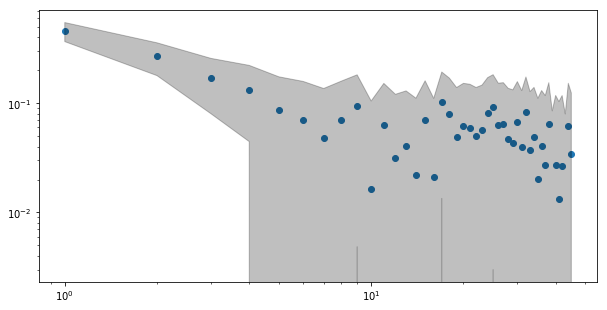

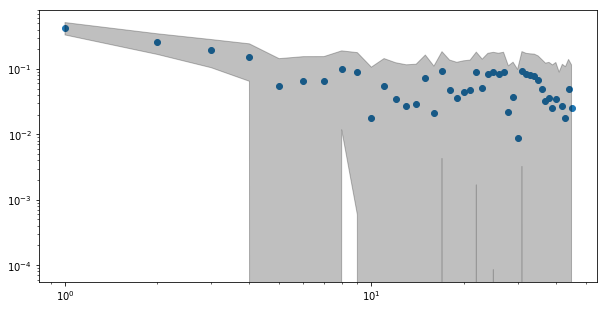

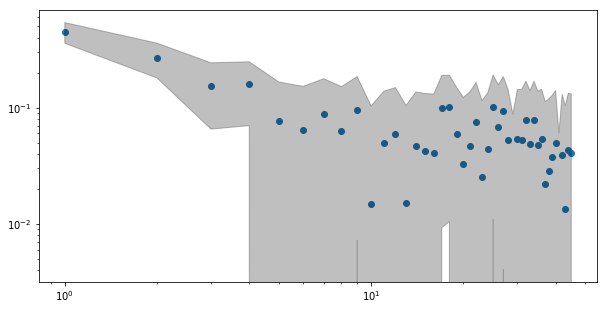

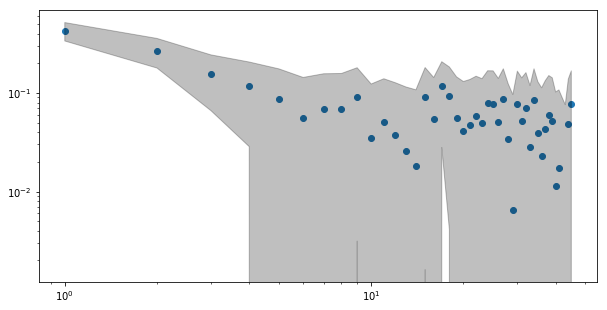

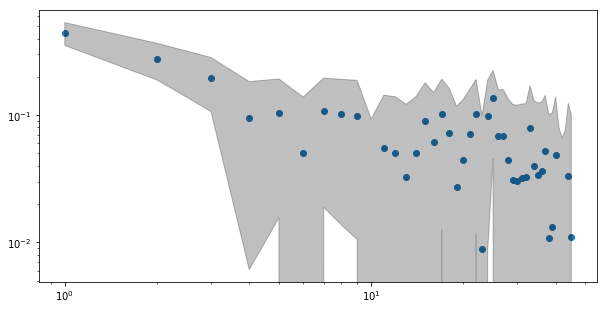

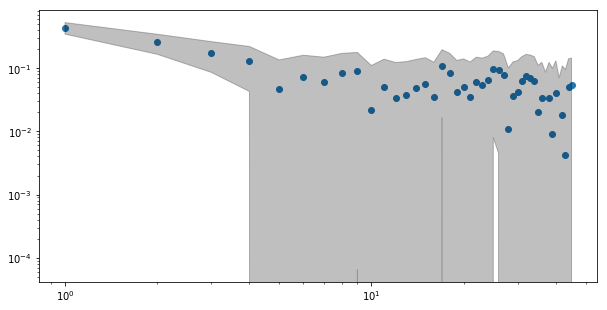

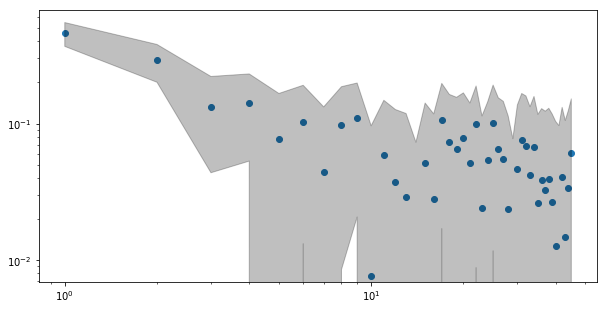

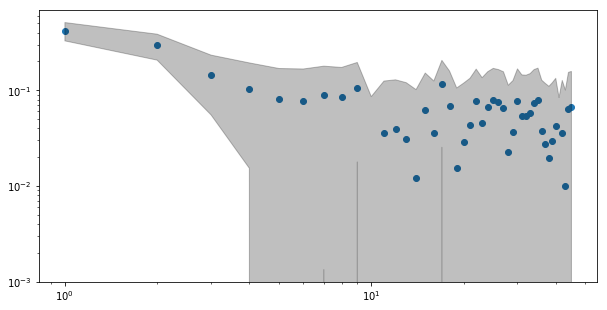

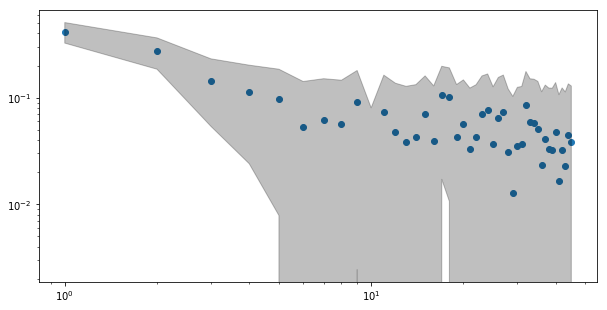

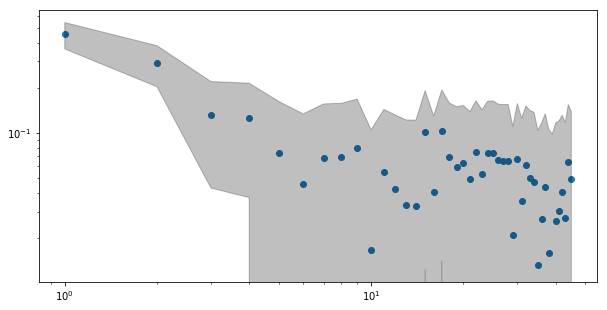

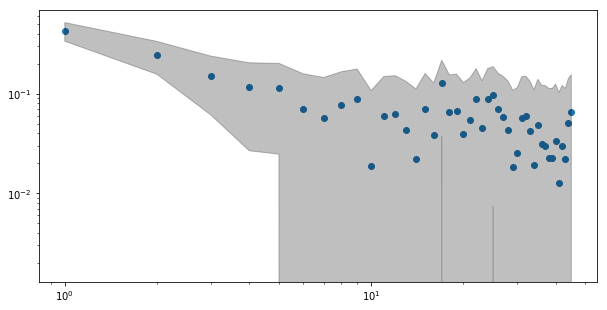

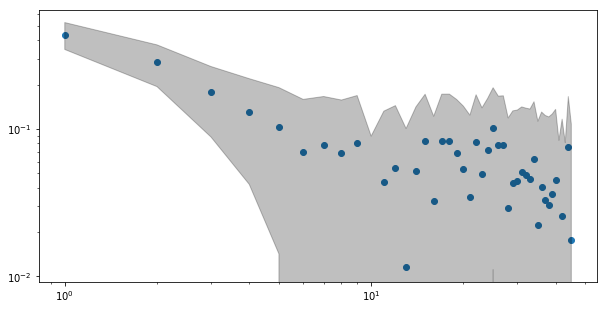

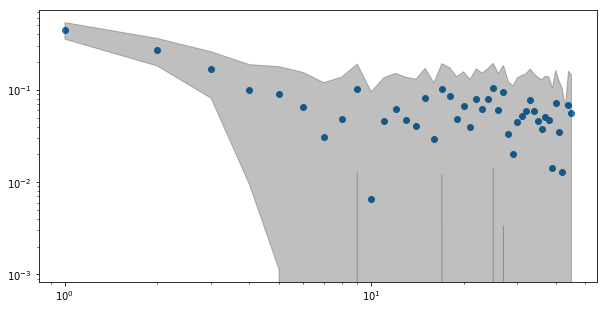

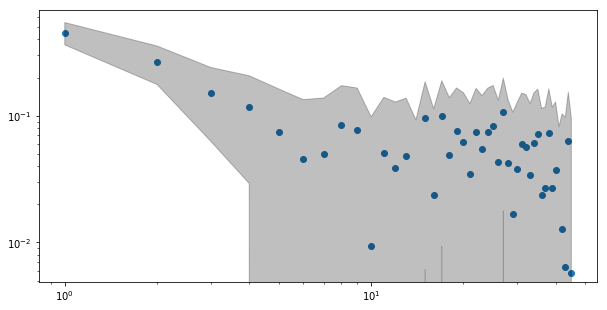

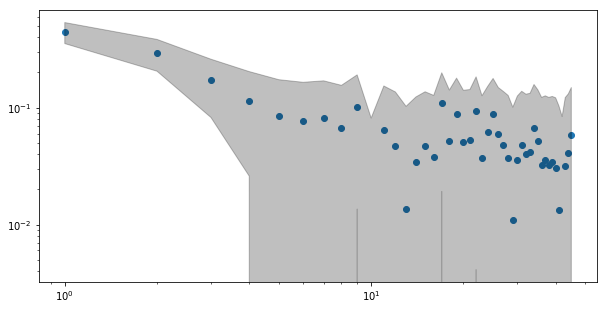

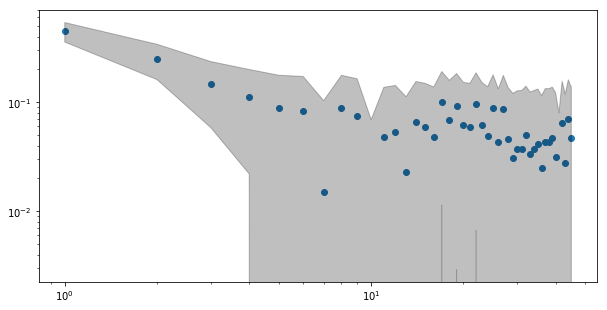

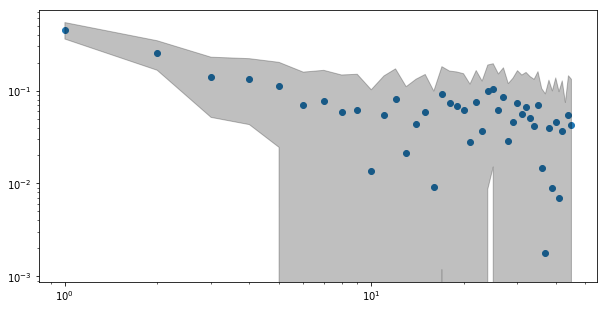

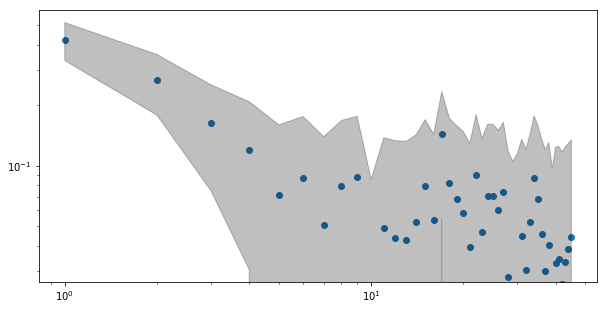

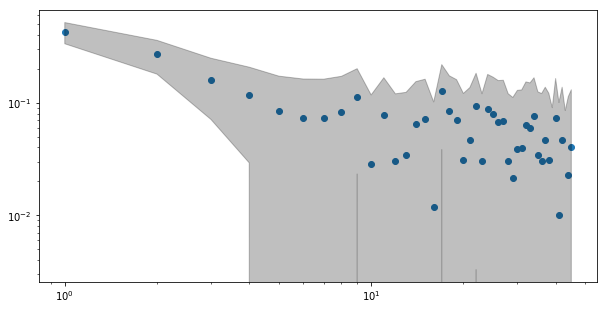

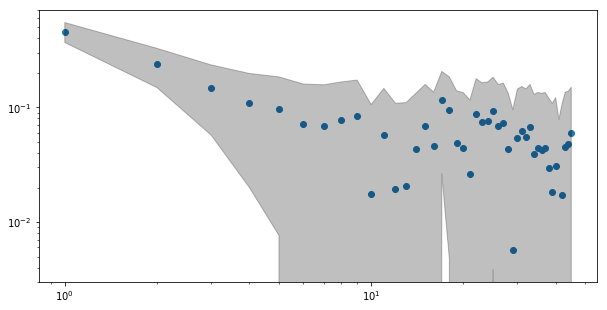

In [68]:
for idx, row in MI_DF.iterrows():
    fig, ax = plt.subplots(figsize=(10,5))
    MI = row.MI-row.shuff_MI
    MI_var = row.MI_var

    ax.scatter(distances, MI)
    ax.fill_between(distances, MI-MI_var, MI+MI_var, alpha = 0.25, color= 'k')
    #ax.set_ylim([1e-3, 1])
    ax.set_yscale('log')
    ax.set_xscale('log')
    plt.show()